In [1]:
import os
import sys

sys.path.append(os.path.abspath('..'))
import modules.io as io

In [2]:
DATA_KEY    = "VAL"
CONFIG_FILE = "../config/resnet.yaml"

config      = io.load_yaml(CONFIG_FILE)
config['MODEL_DIR'] = config['MODEL_DIR'].replace('.','..')

In [3]:
import factories.dataset_factory as dataset_factory

data    = dataset_factory.get(config, DATA_KEY)

239it [00:00, 3805.14it/s]
  4%|▍         | 10/239 [00:00<00:02, 93.17it/s]

centering images


100%|██████████| 239/239 [00:02<00:00, 89.68it/s]


In [4]:
import factories.model_factory as model_factory

model = model_factory.get(config)
model.load()

/home/marsdenlab/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


[None, 3276800]
INFO:tensorflow:Restoring parameters from ../results/ResNetReg/model/ResNetReg


In [5]:
import factories.preprocessor_factory as prepro_factory

preprocessor = prepro_factory.get(config)

In [6]:
import numpy as np
X = 0.1*np.array([preprocessor(x) for x in data[0]])
print(X.shape)

(239, 160, 160, 1)


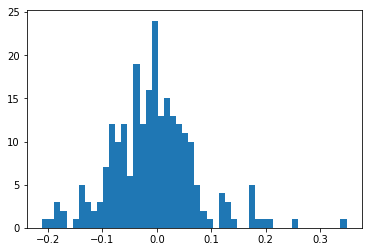

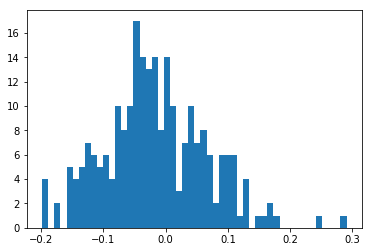

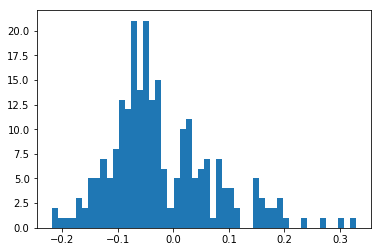

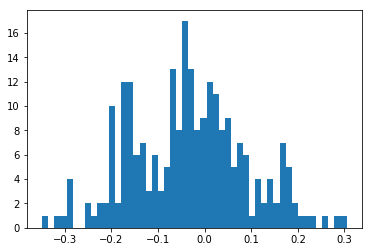

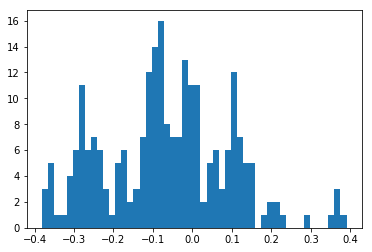

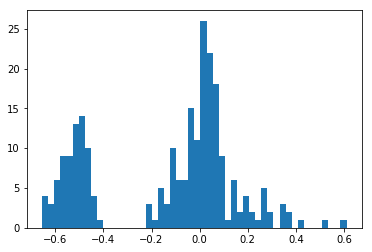

In [7]:
import matplotlib.pyplot as plt

mid = int(X.shape[1]/2)
xl = [-3,8]

plt.figure()
plt.hist(X[:,0,0,0],bins=50)
#plt.xlim(xl)
plt.show()

plt.figure()
plt.hist(X[:,20,20,0],bins=50)
#plt.xlim(xl)
plt.show()

plt.figure()
plt.hist(X[:,40,40,0],bins=50)
#plt.xlim(xl)
plt.show()

plt.figure()
plt.hist(X[:,60,60,0],bins=50)
#plt.xlim(xl)
plt.show()

plt.figure()
plt.hist(X[:,70,70,0],bins=50)
#plt.xlim(xl)
plt.show()

plt.figure()
plt.hist(X[:,mid,mid,0],bins=50)
#plt.xlim(xl)
plt.show()

In [8]:
import tensorflow as tf

In [9]:
tensor_list = [n.name for n in tf.get_default_graph().as_graph_def().node]
for t in tensor_list:
    print(t)

Placeholder
Placeholder_1
resnet/resblock_before/projection/random_normal/shape
resnet/resblock_before/projection/random_normal/mean
resnet/resblock_before/projection/random_normal/stddev
resnet/resblock_before/projection/random_normal/RandomStandardNormal
resnet/resblock_before/projection/random_normal/mul
resnet/resblock_before/projection/random_normal
resnet/resblock_before/projection/W
resnet/resblock_before/projection/W/Assign
resnet/resblock_before/projection/W/read
resnet/resblock_before/projection/zeros
resnet/resblock_before/projection/b
resnet/resblock_before/projection/b/Assign
resnet/resblock_before/projection/b/read
resnet/resblock_before/projection/convolution/dilation_rate
resnet/resblock_before/projection/convolution
resnet/resblock_before/projection/add
resnet/resblock_before/projection/Identity
resnet/resblock_before/res_0/conv_1/random_normal/shape
resnet/resblock_before/res_0/conv_1/random_normal/mean
resnet/resblock_before/res_0/conv_1/random_normal/stddev
resnet/r

save/Assign_136
save/Assign_137
save/Assign_138
save/Assign_139
save/Assign_140
save/Assign_141
save/Assign_142
save/Assign_143
save/Assign_144
save/Assign_145
save/Assign_146
save/Assign_147
save/Assign_148
save/Assign_149
save/Assign_150
save/Assign_151
save/restore_all
Variable/initial_value
Variable
Variable/Assign
Variable/read
PiecewiseConstant/Const
PiecewiseConstant/Const_1
PiecewiseConstant/Const_2
PiecewiseConstant/Const_3
PiecewiseConstant/Const_4
PiecewiseConstant/Const_5
PiecewiseConstant/Const_6
PiecewiseConstant/LessEqual
PiecewiseConstant/Greater
PiecewiseConstant/Greater_1
PiecewiseConstant/LessEqual_1
PiecewiseConstant/and
PiecewiseConstant/Greater_2
PiecewiseConstant/LessEqual_2
PiecewiseConstant/and_1
PiecewiseConstant/case/preds_c
PiecewiseConstant/case/Cast
PiecewiseConstant/case/Const
PiecewiseConstant/case/num_true_conds
PiecewiseConstant/case/n_true_conds
PiecewiseConstant/case/LessEqual
PiecewiseConstant/case/Assert/Const
PiecewiseConstant/case/Assert/AssertGu

gradients/resnet/resblock_before/res_11/conv_2/add_grad/Sum
gradients/resnet/resblock_before/res_11/conv_2/add_grad/Reshape
gradients/resnet/resblock_before/res_11/conv_2/add_grad/Sum_1
gradients/resnet/resblock_before/res_11/conv_2/add_grad/Reshape_1
gradients/resnet/resblock_before/res_11/conv_2/add_grad/tuple/group_deps
gradients/resnet/resblock_before/res_11/conv_2/add_grad/tuple/control_dependency
gradients/resnet/resblock_before/res_11/conv_2/add_grad/tuple/control_dependency_1
gradients/resnet/resblock_before/res_11/conv_2/convolution_grad/ShapeN
gradients/resnet/resblock_before/res_11/conv_2/convolution_grad/Conv2DBackpropInput
gradients/resnet/resblock_before/res_11/conv_2/convolution_grad/Conv2DBackpropFilter
gradients/resnet/resblock_before/res_11/conv_2/convolution_grad/tuple/group_deps
gradients/resnet/resblock_before/res_11/conv_2/convolution_grad/tuple/control_dependency
gradients/resnet/resblock_before/res_11/conv_2/convolution_grad/tuple/control_dependency_1
gradients/

resnet/resblock_before/res_6/conv_1/W/Adam
resnet/resblock_before/res_6/conv_1/W/Adam/Assign
resnet/resblock_before/res_6/conv_1/W/Adam/read
resnet/resblock_before/res_6/conv_1/W/Adam_1/Initializer/zeros/shape_as_tensor
resnet/resblock_before/res_6/conv_1/W/Adam_1/Initializer/zeros/Const
resnet/resblock_before/res_6/conv_1/W/Adam_1/Initializer/zeros
resnet/resblock_before/res_6/conv_1/W/Adam_1
resnet/resblock_before/res_6/conv_1/W/Adam_1/Assign
resnet/resblock_before/res_6/conv_1/W/Adam_1/read
resnet/resblock_before/res_6/conv_1/b/Adam/Initializer/zeros
resnet/resblock_before/res_6/conv_1/b/Adam
resnet/resblock_before/res_6/conv_1/b/Adam/Assign
resnet/resblock_before/res_6/conv_1/b/Adam/read
resnet/resblock_before/res_6/conv_1/b/Adam_1/Initializer/zeros
resnet/resblock_before/res_6/conv_1/b/Adam_1
resnet/resblock_before/res_6/conv_1/b/Adam_1/Assign
resnet/resblock_before/res_6/conv_1/b/Adam_1/read
resnet/resblock_before/res_6/conv_2/W/Adam/Initializer/zeros/shape_as_tensor
resnet/resbl

In [10]:
N=11
#convs = ['conv_1', 'conv_2', 'conv_3']
convs = ['conv_3']
ops_before = []
for i in range(N):
    for c in convs:
        s = 'resnet/resblock_before/res_{}/{}/add:0'.format(i,c)
        
        op = tf.get_default_graph().get_tensor_by_name(s)
        ops_before.append(op)

In [11]:
ops_after = []
for i in range(N):
    for c in convs:
        s = 'resnet/resblock_after/res_{}/{}/add:0'.format(i,c)
        
        op = tf.get_default_graph().get_tensor_by_name(s)
        ops_after.append(op)

In [12]:
ops = ops_before+ops_after

In [13]:
nb = 8
xb = X[:nb,:,:]
outs = []
for op in ops:
    out = model.sess.run(op,{model.x:xb})
    print(out.shape)
    outs.append(out)

(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)


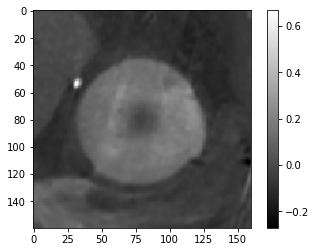

0


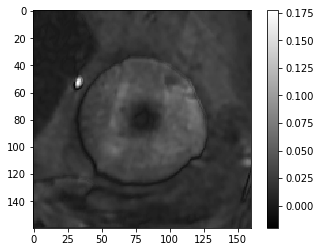

1


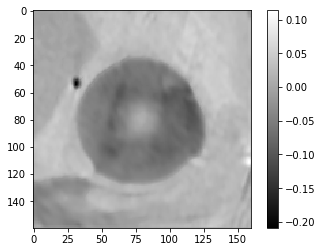

2


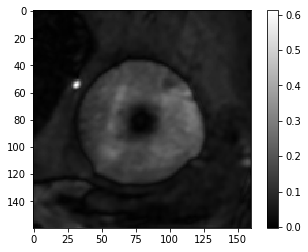

3


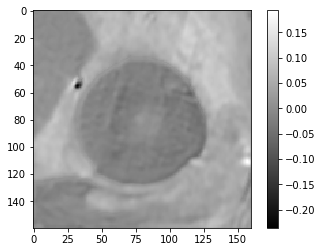

4


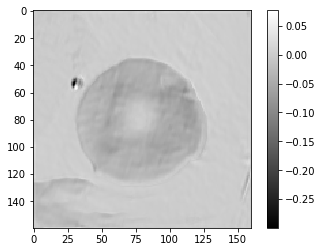

5


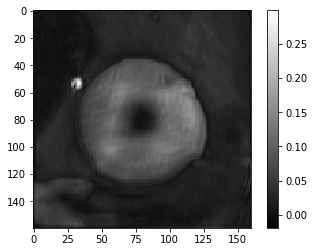

6


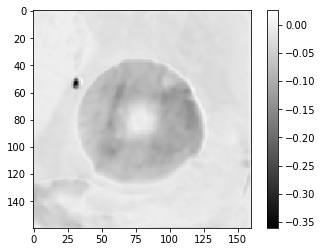

7


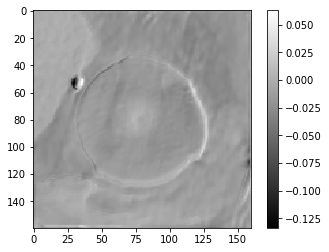

8


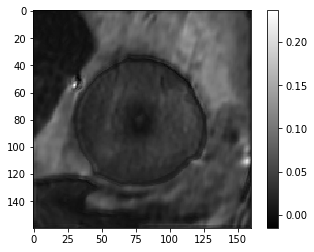

9


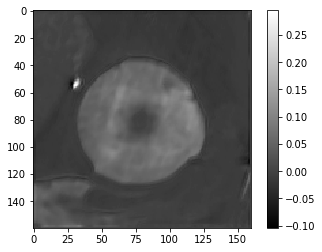

10


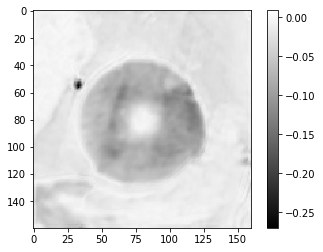

11


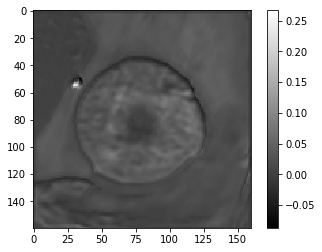

12


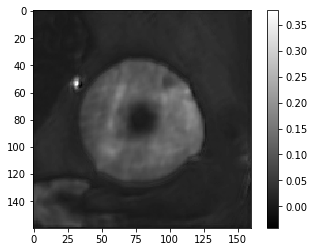

13


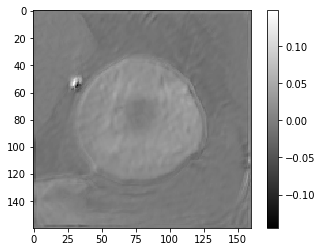

14


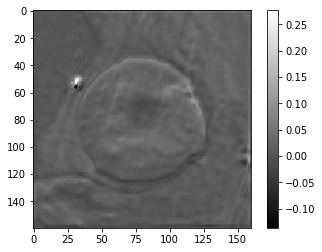

15


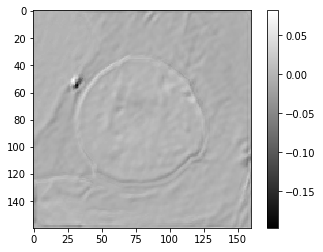

16


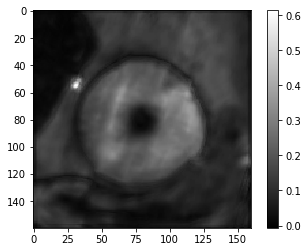

17


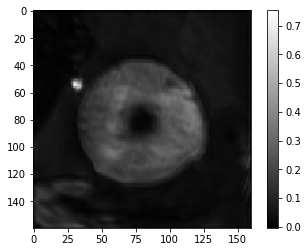

18


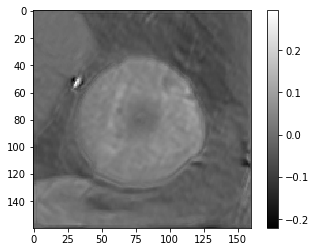

19


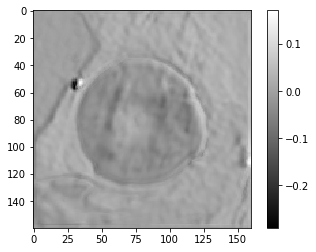

20


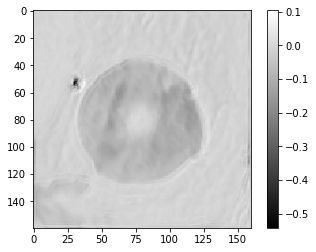

21


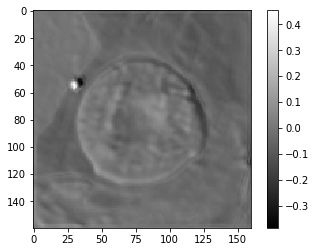

In [14]:
plt.figure()
plt.imshow(xb[0,:,:,0], cmap='gray')
plt.colorbar()
plt.show()

for i,o in enumerate(outs):
    k = np.random.randint(o.shape[3])
    y = o[0,:,:,k]
    
    print(i)
    plt.figure()
    plt.imshow(y, cmap='gray')
    plt.colorbar()
    plt.show()

In [15]:
s = 'fc_final/add:0'
op = tf.get_default_graph().get_tensor_by_name(s)
yhat = model.sess.run(op,{model.x:xb})

for y in yhat:
    print(y)

[-3.6360235 -3.3185415 -3.8513093 -4.577515  -2.7921598 -2.240169
 -2.451287  -2.9434812 -3.7055843 -3.266656  -3.0507505 -2.391202
 -3.2307367 -3.9462988 -2.000904 ]
[-3.691174  -3.2922544 -4.210084  -4.342685  -2.638464  -2.5008636
 -2.5808964 -3.125716  -3.9751658 -3.4349272 -2.9727325 -2.4066606
 -3.2506053 -4.1776752 -1.8703144]
[-3.7036834 -3.1338694 -3.8429115 -4.217907  -2.7155075 -2.4472108
 -2.2737737 -3.1903021 -3.7534153 -3.4048796 -2.5174665 -2.2229352
 -3.2268527 -3.7670999 -1.4052906]
[-3.580249  -3.343755  -3.7787328 -4.3899775 -2.9090915 -2.349101
 -2.3650556 -3.0498753 -3.7381086 -3.5321858 -2.5837657 -2.4074664
 -3.1524887 -3.9108195 -1.6220375]
[-3.4366596 -3.2897713 -3.9345355 -4.3111258 -2.8336432 -2.316288
 -2.8370128 -2.9725096 -3.8706856 -3.6464179 -2.5310647 -2.368218
 -3.2202663 -3.792065  -1.5668241]
[-3.637819  -3.2753108 -3.9000678 -4.4383144 -2.9988613 -2.5395033
 -2.7520022 -3.07898   -3.970006  -3.5945716 -2.9378698 -2.6124241
 -3.258562  -3.979577  -1.